핸즈온 4장 모델 훈련 p.157-202

---

# CH4 모델 훈련

## 4.1 선형 회귀

선형 모델
- 입력 특성의 가중치 합과 편향이라는 상수를 더해 예측을 만든다.

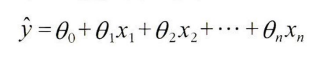

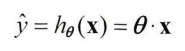

모델을 훈련시킨다.
- 모델이 훈련 세트에 가장 잘 맞도록 모델 파라미터를 설정하는 것

-> 먼저 모델이 훈련 데이터에 얼마나 잘 들어맞는지 측정해야 함.


가장 널리 사용되는 성능 측정 지표 : RMSE
- 선형 회뤼 모델을 훈련시키려면 RMSE를 최소화 하는 세타를 찾아야 한다.

-> MSE를 최소화 하는 것이 더 간단하다.

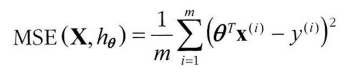

### 4.1.1 정규방정식

정규방정식
- 비용 함수를 최소화 하는 세타값을 찾기 위한 해석적인 방법
- 바로 결과를 얻을 수 있는 수학 공식

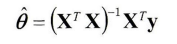

In [ ]:
import numpy as np

X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

- 선형처럼 보이는 데이터 생성

In [ ]:
X_b = np.c_[np.ones((100,1)), X]  # 모든 샘플에 x0 = 1을 추가합니다.
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

- 정규방정식 사용해 theta hat 계산
- np.linalg.inv() 함수를 통해 역행렬 계산
- dot() 메서드를 사용해 행렬 곱셈

In [ ]:
theta_best

array([[3.74722212],
       [3.14530562]])

- 정규 방정식으로 계산한 값 확인
- 매우 비슷하지만 잡음 때문에 원래 함수의 파라미터를 정확하게 재현하지 못함.

In [ ]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]  # 모든 샘플에 x0 = 1을 추가합니다.
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.74722212],
       [10.03783337]])

- theta hat을 사용해 예측

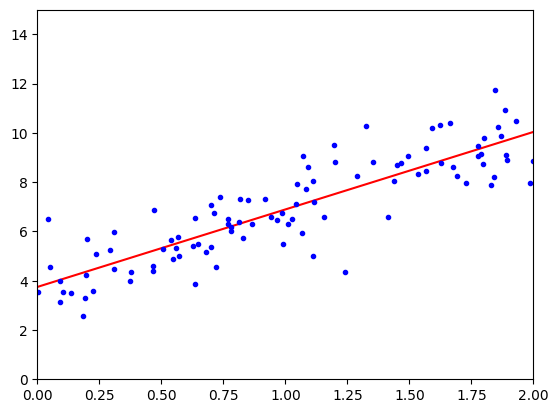

In [ ]:
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

사이킷런에서 선형 회귀 수행

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.74722212]), array([[3.14530562]]))

In [ ]:
lin_reg.predict(X_new)

array([[ 3.74722212],
       [10.03783337]])

In [ ]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.74722212],
       [3.14530562]])

- LinearRegression 클래스는 spicy.linalg.lstsq() 함수를 기반으로

In [ ]:
np.linalg.pinv(X_b).dot(y)

array([[3.74722212],
       [3.14530562]])

- 이 함수는 Theta hat =  (X)+ y 계산
- (X)+ 는 X의 유사 역행렬 -> np.linalg.pinv() 함수를 사용해 직접 구할 수 있다.

유사 역행렬
- 특잇값 분해(SVD) 라 부르는 표준 행렬 분해 기법을 사용해 계산.
>- X = U * sigma * V.T 로 분해
>- X+ = V * (sigma)+ * U.T로 계산
>- 실제로 m<n이거나 어떤 특성이 중복되어 행렬 X.T*X의 역행렬이 없다면 정규방정식은 작동하지 않는다.
>- 유사역행렬은 항상 구할 수 있다


### 4.1.2 계산 복잡도

정규 방정식은 (n+1)x(n+1) 크기가 되는 X.T*X 의 역행렬을 계산한다.

-> 역행렬을 계산하는 계싼 복잡도는 일반적으로 O(n^2.4) ~ O(n^3) 사이이다.

- 사이킷런의 LinearRegression 클래스가 사용하는 SVD 방법은 약 O(n^2) 이다.

## 4.2 경사 하강법

경사 하강법(GD)
- 여러 종류의 문제에서 최적의 해법을 찾을 수 있는 일반적인 최적화 알고리즘
- 기본 아이디어 : 비용 함수를 최소화하기 위해 반복해서 파라미터를 조정하는 것
>- 파라미터 벡터 theta에 대해 비용 함수의 현재 그레디언트를 계산
>- 그레디언트가 감소하는 방향으로 진행
>- 그레디언트가 0이 되면 최솟값에 도달한 것이다.

- 무작위 초기화 : theta를 임의의 값으로 시작

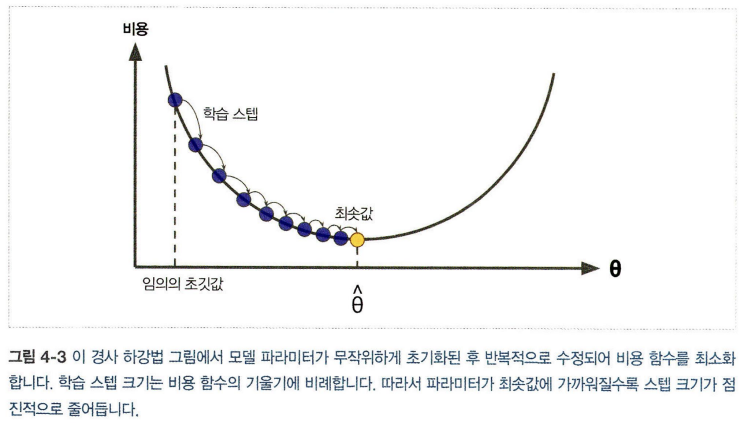

학습률
- 경사 하강법에서 중요한 파라미터로 스텝의 크기
- 너무 작으면 반복을 많이 해야해서 시간이 오래 걸린다.
- 너무 크면 이전보다 높은 곳으로 올라갈 수도 있다.

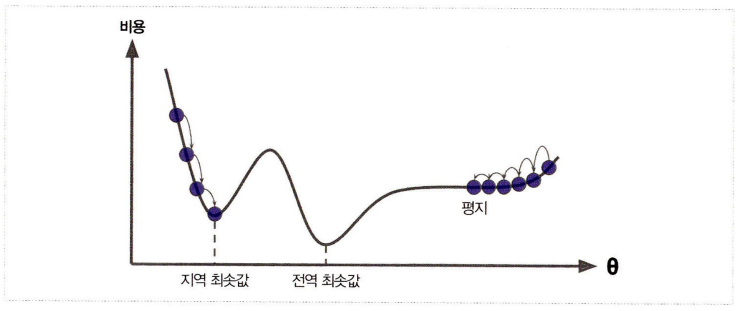

경사 하강법의 두 가지 문제점
1. 왼쪽에서 시작하면 전역 최솟값보다 덜 좋은 지역 최솟값에 수렴한다.
2. 오른쪽에서 시작하면 평탄한 지역을 지나기 위해 시간이 오래 걸리고 일찍 멈추게 되어 전역 최솟값에 도달하지 못한다.

선형 회귀를 위한 MSE 비용 함수는 곡선에서 어떤 두 점을 선택해 선을 그어도 곡선을 가로지르지 않는 볼록함수이다.

- 이는 지역 최솟값이 없고 하나의 전역 최솟값만 있다는 뜻.
- 또한 연속된 함수, 기울이가 갑자기 변하지 않음

-> 경사 하강법이 전역 최솟값에 가깝게 접근할 수 있다는 것을 보장

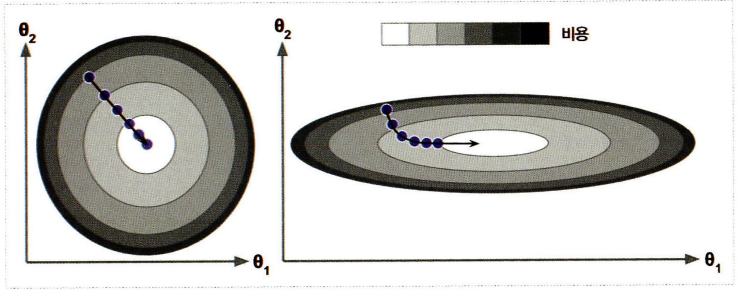

- 스케일에 따라 모양과 시간이 달라진다.

### 4.2.1 배치 경사 하강법

편도 함수
- 경사 하강법을 구현하려면 각 모델 파라미터 theta(j)에 대해 비용 함수의 그레디언트를 계산해야 한다.
- 다시 말해 theta(j)가 조금 변경될 때 비용 함수가 얼마나 바뀌는지 계산해야 한다.

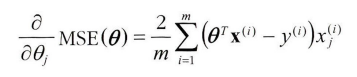

- 파라미터 theta(j)에 대한 비용함수의 편도함수

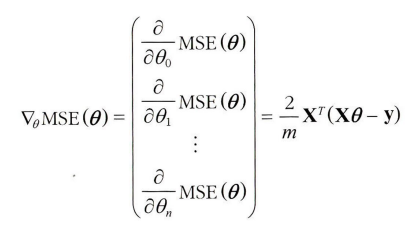

- 배치 경사 하강법
- 이 공식은 매 경사 하강법 스템에서 전체 훈련 세트 X에 대해 계산한다.
- 즉, 매 스텝에서 훈련 데이터 전체를 사용한다.
- 큰 훈련 세트에서는 느리다.


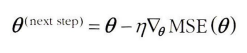

- 위로 향하는 그레디언트 벡터가 구해지면 반대 방향인 아래로 가야한다.
- 학습률을 사용
- 내려가는 스텝의 크기를 결정하기 위해 그레디언트 벡터에 학습률을 곱한다.

In [ ]:
eta = 0.1   # 학습률
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)   # 무작위 초기화

for iteration in range(n_iterations):
  gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
  theta = theta - eta * gradients

In [ ]:
theta

array([[3.74722212],
       [3.14530562]])

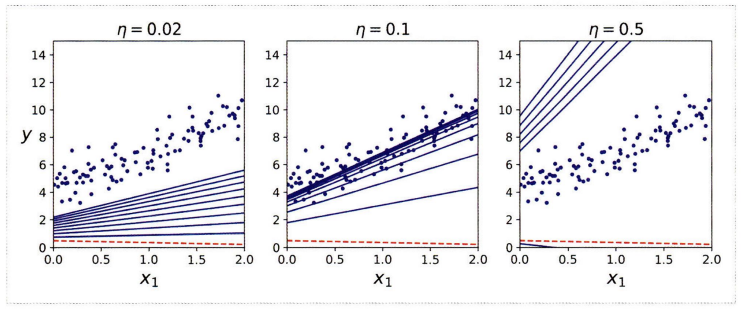

1. 왼쪽 학습률이 너무 낮다.
- 시간이 오래 걸림.
2. 가운데는 학습률이 아주 적당해 보인다.
- 반복 몇 번 마네 이미 최적점에 수렴함.
3. 오른쪽은 학습률이 너무 높다.
- 알고리즘이 이리저리 널뛰면서 스텝마다 최적점에서 점점 더 멀어져 발산한다.

적절한 학습률을 찾으러면 그리드 탐색 사용

-> 그리드 탐색에서 수렴하는 데 너무 오래 걸리는 모델을 막기 위해 반복 횟수를 제한 해야함.

반복 횟수는 어떻게 지정?
- 반복 횟수를 아주 크게 지정하고 그레이디언트 벡터가 아주 작아지면, 즉 벡터의 노름이 어떤 허용오차보다 작아지면 경사 하강법이 최솟값에 도달한 것이므로 알고리즘 중지

### 4.2.2 확률적 경사 하강법

배치 경사 하강법의 가장 큰 문제
- 매 스텝에서 전체 훈련 세트를 사용해 그레이디언트를 계산.
- 훈련 세트가 커지면 매우 느려진다.

확률적 경사 하강법
- 매 스텝에서 한 개의 샘플을 무작위로 선택
- 그 하나의 샘플에 대한 그레디이언트를 계산
- 매 반복에서 다뤄야 할 데이터가 매우 적기 때문에 한 번에 하나의 샘플을 처리하면 알고리즘이 훨씬 빠르다.
- 매우 큰 훈련 세트도 훈련시킬 수 있다.(매 반복에서 하나의 샘플만 메모리에 있으면 되므로)
- 확률적(무작위)이기 때문에 배치 경사 하강법보다 훨씬 불안정 -> 요동치며 평균적으로 감소
- 비용 함수가 불규칙할 경우 -> 지역 최솟값을 건너뛸 수 있도록 도와주므로 확률적 경사 하강법이 배치 경사 하강법보다 전역 최솟값을 찾을 가능성이 높다.


- 무작위성
>- 지역 최솟값에서 탈출시켜줘서 좋지만 알고리즘은 전역 최솟값에 다다르지 못하게 한다는 점에서 좋지 않다.
>- 해결 방법 : 학습률을 점진적으로 감소 -> 담금질 기법 알고리즘과 유사
- 학습 스케쥴
>- 매 반복에서 학습률을 결저정하는 함수
>- 너무 빨리 줄어들면 지역 최솟값에 갇히거나 중간에 멈춰버릴 수 있다.
>- 너무 천천히 줄어들면 오랫동안 주변을 맴돌거나 훈련을 너무 일찍 중지할 수 있다.

In [ ]:
n_epochs = 50   # 각 반복 = 에포크
t0, t1 = 5,50   # 학습 스케줄 하이퍼파라미터

def learning_schedule(t):
  return t0 / (t + t1)

theta = np.random.randn(2,1)   # 무작위 초기화

for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(epoch * m + i)
    theta = theta - eta * gradients

- 학습 스케줄 사용한 확률적 경사 하강법의 구현
- 일반적으로 한 반복에서 m번 되풀이 되고, 이때 각 반복으로 에포크라고 한다.

In [ ]:
theta

array([[3.73675483],
       [3.12742269]])

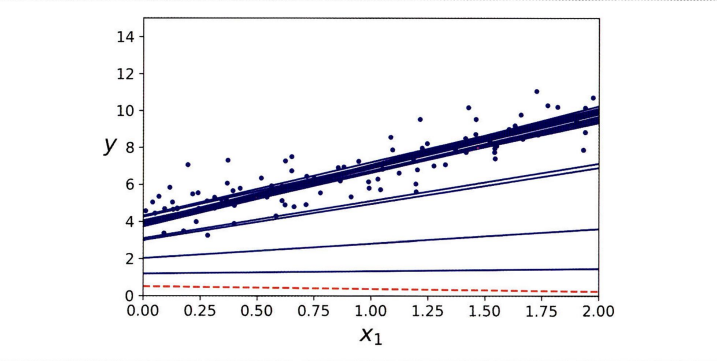

- 훈련 스텝의 첫 20개 -> 스텝이 불규칙하게 진행된다.

샘플을 무작위로 선택하기 때문에 어떤 샘플은 한 에포크에서 여러 번 선택될 수 있고 어떤 샘플은 전혀 선택되지 못할 수도 있다.

-> 모든 샘플을 사용하게 하려면 훈련 세트를 섞은 후 차례대로 하나씩 선택하고 다음 에포크에서 다시 섞는 식의 방법을 사용할 수 있다.

-> 그러나 이렇게 하면 보통 더 늦게 수렴한다.

In [ ]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = None, eta0 = 0.1)  # max_iter : 최대 에포크 횟수. tol : 손실이 줄어들 때까지 실행되는 기준. eta0 : 학습률. penalty : 규제
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

- 사이킷런에서 SGD 방식으로 선형 회귀를 사용하려면 기본값으로 제곱 오차 비용 함수를 최적화하는 SGDRegressor 클래스를 사용한다.

In [ ]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.70307429]), array([3.14784711]))

- 정규방정식으로 구한 것과 매우 비슷한 값을 얻음.

### 4.2.3 미니배치 경사 하강법

각 스텝에서 전체 훈련 세트나 하나의 샘플을 기반으로 그레이디언트를 계산하는 것이 아니라 미니배치라 부르는 임의의 작은 샘플 세트에 대해 그레이디언트를 계산한다.

- 주요 장점 : 행렬 연산에 최적화된 하드웨어, 특히 GPU를 사용해서 얻는 성능 향상

- 미니배치를 어느 정도 크게 하면 SGD보다 덜 불규칙하게 움직인다. -> 지역 최솟값에서 빠져나오기는 더 힘들수도 있다.


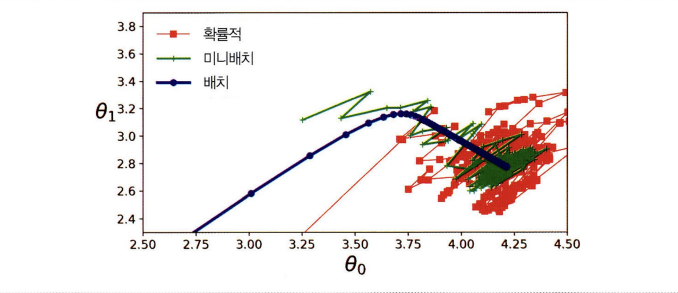

세 가지 경사 하강법 알고리즘이 훈련 과정동안 파라미터 공간에서 움직인 경로
- 모두 최솟값 근처에 도달
- 배치 경사 하강법 -> 실제로 최솟값에서 멈춤, 시간이 많이 걸림
- 확률적/미니배치 경사 하강법 -> 근처에서 맴돌고 있음, 적절한 학습 스케줄 사용

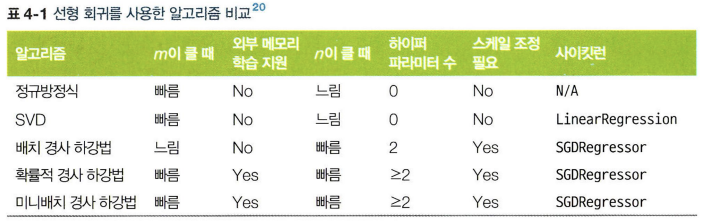

## 4.3 다항 회귀

다항 회귀
- 비선형 데이터를 학습하는 데 선형 모델을 사용
- 각 특성의 거듭제곱을 새로운 특성으로 추가하고, 이 확장된 특성을 포함한 데이터셋에 선형 모델을 훈련시키는 것

In [ ]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

- 2차방정식으로 잡음이 포함된 비선형 데이터 생성

-> 직선은 이 데이터에 잘 맞지 않을 것.

-> 사이킷런의 PolynimialFeatures를 사용해 훈련 데이터 변환

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([0.92106422])

- 훈련 세트에 있는 각 특성을 제곱하여 새로운 특성으로 추가

In [ ]:
X_poly[0]

array([0.92106422, 0.8483593 ])

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.1489068]), array([[1.00794636, 0.46791241]]))

- 확장된 훈련 데이터에 LinearRegression 적용

특성이 여러 개일 때 다항 회귀는 이 특서 사이의 관계를 찾는다.
- PolynomialFeatures가 주어진 차수까지 특성 간의 모든 교차항을 추가한다.

## 4.4 학습 곡선

고차 다항 회귀를 적용하면 보통의 선형 회귀에서보다 훨씬 더 훈련 데이터에 잘 맞추려 할 것이다.

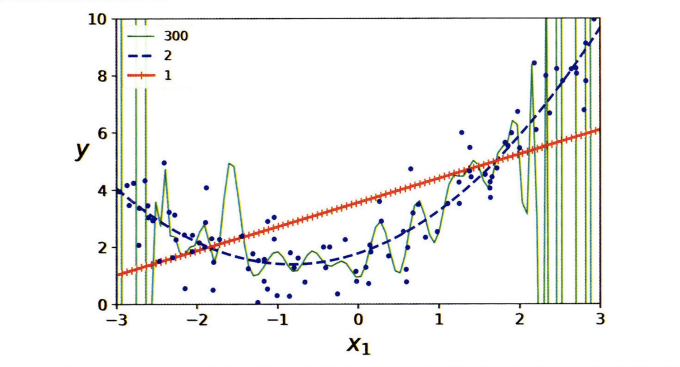

- 고차 다항 회귀 모델은 심각하게 훈련 데이터에 과대적합
- 선형 모델은 과소적합

모델이 데이터에 과대적합/과소적합 되었는지 아는 방법
1. 교차 검증 사용
- 훈련 데이터에서 성능이 좋지만 교차 검증 점수가 나쁘다면 과대적합된 것 -> 모델이 복잡하다.
- 양쪽에 모두 좋지 않으면 과소 적합 -> 모델이 단순하다.

2. 학습 곡선을 살펴보는 것
- 훈련 세트와 검증 세트의 모델 성능을 훈련 세트 크기의 함수로 나타낸다.
- 단순히 훈련 세트에서 크기가 다른 서브 세트를 만들어 모델을 여러번 훈련 시키면 된다.

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
  train_errors, val_errors = [], []
  for m in range(1, len(X_train)):
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))
  plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="훈련 세트")
  plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="검증 세트")

- 훈련 데이터에서 학습 곡선을 그리는 함수 정의

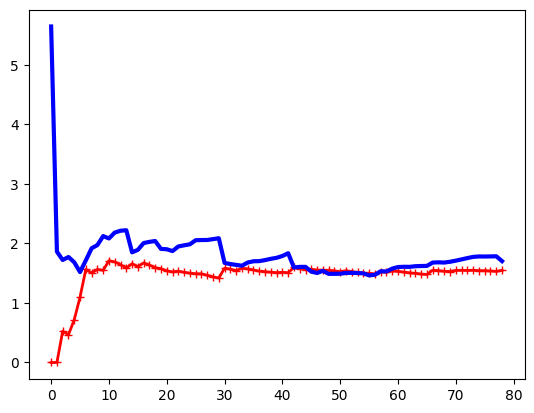

In [ ]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

- 단순 선형 회귀 모델의 학습 곡선

(1) 훈련 데이터의 성능
- 그래프가 0에서 시작하므로 훈련 세트에 하나 혹은 두 개의 샘플이 이쓸 땐 모델이 완벽하게 작동
- 하지만 훈련 세트에 샘플이 추가됨에 따라 잡음도 있고 비선형이기 때문에 모델이 훈련 데이터를 완벽히 학습하는 것은 불가능

(2) 검증 데이터에 대한 모델의 성능
0 모델이 적은 수의 샘플로 훈련될 때는 제대로 일반화 x -> 검증 오차가 초기에 매우 크다
- 샘플이 추가됨에 따라 학습이 되고 검증 오차가 천천히 감소한다.


과소적합 모델 = 두 곡선이 수평한 구간을 만들고 꽤 높은 오차에서 매우 가까이 근접해있어

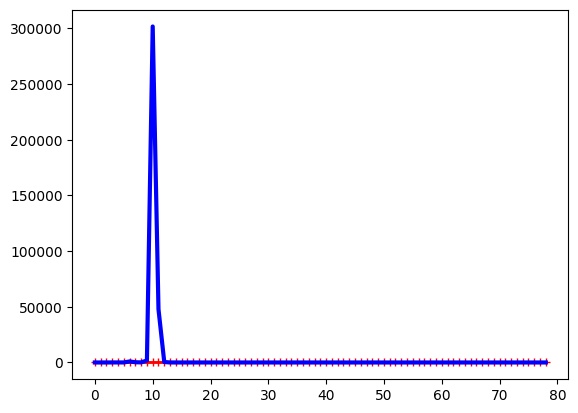

In [ ]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
])
plot_learning_curves(polynomial_regression, X, y)

- 10차 다항 회귀 모델의 학습 곡선

중요한 차이점
1. 훈련 데이터의 오차가 선형 회귀 모델보다 훨씬 낮다.
2. 두 곡선 사이에 공간이 있다. -> 훈련 데이터에서의 모델 성능이 검증 데이터에서보다 훨씬 낫다는 뜻이고 이는 과대적합 모델의 특징

#### 편향/분산 트레이드오프
모델의 일반화 오차는 세 가지 다른 종류의 오차의 합으로 표현할 수 있다.
1. 편향
2. 분산
3. 줄일 수 없는 오차

모델의 복잡도가 커지면 분산이 커지고 편향이 줄어든다.

반대로 모델의 복잡도가 줄어들면 편향이 커지고 분산이 작아진다.

## 4.5 규제가 있는 선형 모델

과대 적합을 감소시키는 좋은 방법 : 모델 규제

### 4.5.1 릿지 회귀

릿지 회귀
- 규제가 추가된 선형 회귀 버전
- 규제항이 비용 함수에 추가
- 학습 알고리즘을 데이터에 맞추는 것뿐만 아니라 모델의 가중치가 가능한 한 작게 유지되도록 노력
- 규제항 : 훈련하는 동안에만 비용 함수에 추가
- 모델의 훈련이 끝나면 모델의 성능을 규제가 없는 성능 지표로 평가

하이퍼파라미터 알파
- 모델을 얼마나 규제할지 조절
- 0이면 릿지 회귀는 선형 회귀와 같아진다.
- 알파가 아주 크면 모든 가중치가 거의 0에 가까워지고 결국 데이터의 평균을 지나는 수평선이 된다.

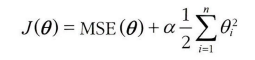

- 릿지 회귀의 비용 함수

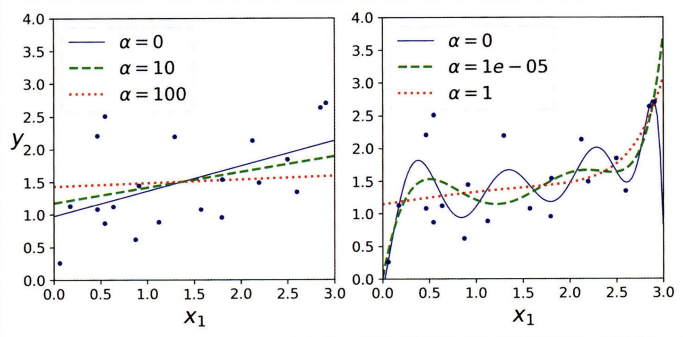

- 선형 데이터에 몇 가지 다른 알파를 사용해 릿지 모델을 훈련시킨 결과
- 알파를 증가시킬 수록 직선에 가까워진다.
- 모델의 분산은 줄었지만 편향은 커지게 된다.

릿지 회귀 계산하기 위해 정규방정식 사용할 수도 있고 경사 하강법을 사용할 수도 있다.

In [ ]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[5.04352286]])

- 정규방정식을 사용한 릿지 회귀 적용하는 예

In [ ]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([5.01725523])

- 확률적 경사 하강법을 사용했을 때

### 4.5.2 라쏘 회귀

- 선형 회귀의 또 다른 규제된 버전
- 릿지 회귀처럼 비용 함수에 규제항을 더하지만, 가중치 벡터의 l1 노름을 사용한다.

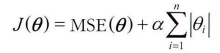

- 라쏘 회귀의 비용 함수

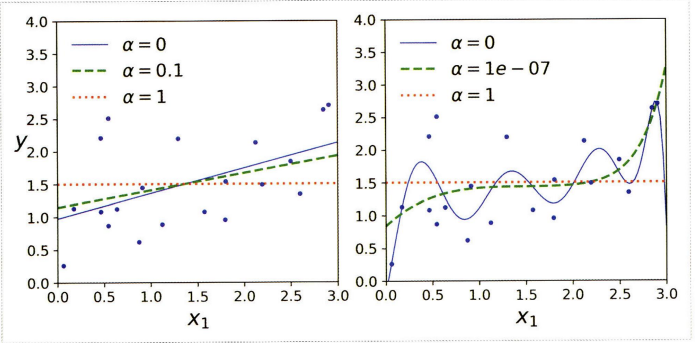

- 다양한 수준의 라쏘 규제를 사용한 선형 회귀와 다항 회귀

라쏘 회귀의 중요한 특징 : 덜 중요한 특성의 가중치를 제거하려고 한다는 점.(즉, 가중치가 0이 된다.)

-> 라쏘 회귀는 자동으로 특성 선택을 하고 희소 모델을 만든다.

- 라쏘와 다른 점
1. 첫째 파라미너터가 전역 최적점에 가까워질수록 그레이디언트가 작아진다. -> 경사 하강법이 자동으로 느려지고 수렴에 도움이 된다.
2. 알파를 증가시킬수록 최적의 파라미터가 원점에 더 가까워진다. 하지만 완전히 0이 되지는 않는다.

- 라쏘를 사용할 때 경사 하강법이 최적점 근처에서 진동하는 것을 막으려면 훈련하는 동안 점진적으로 학습률을 감소시켜야한다

In [ ]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([5.00403778])

- Lasso 대신 SGDRegressor(penalty="l1") 사용 가능

### 4.5.3 엘라스틱넷

- 릿지 회귀와 라쏘 회귀를 절충한 모델
- 규제항은 릿지와 회귀의 규제항을 단순히 더해서 사용하며, 혼합 저도는 혼합 비율 r을 사용하여 조절.
- r=0 : 릿지회귀
- r=1 : 라쏘 회귀

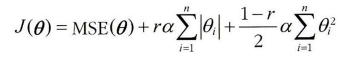

보통의 선형회귀, 릿지, 라쏘, 엘라스팃넷을 언제 사용해야할까?
- 규제가 약간 있는 것이 대부분의 경우에 좋으므로 일반적으로 평범한 선형 회귀는 피하기
- 릿지가 기본이 되지만 쓰이는 특성이 몇 개뿐이라고 의심되면 라쏘나 엘라스틱넷이 낫다.
- 특성 수가 훈련 샘플 수보다 많거나 특성 몇 개가 강하게 연관되어 있을 때는 보통 라쏘가 문제를 일으키므로 엘라스틱넷을 선호한다.

In [ ]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([5.00360077])

### 4.5.4 조기 종료

- 경사 하강법과 같은 반복적인 학습 알고리즘을 규제하는 아주 색다른 방식은 검증 에러가 최솟값에 도달하면 바로 훈련을 중지시키는 것
- 에포크가 진행됨에 따라 알고리즘이 점차 학습되어 훈련 세트에 대한 예측 에러(RMSE)와 검증 세트에 대한 예측 에러 줄어든다.
- 그러다 다시 상승한다. -> 모델이 훈련 데이터에 과대적합되기 시작하는 것 의미

조기 종료는 검증 에러가 최소에 도달하는 즉시 훈련을 멈추는 것

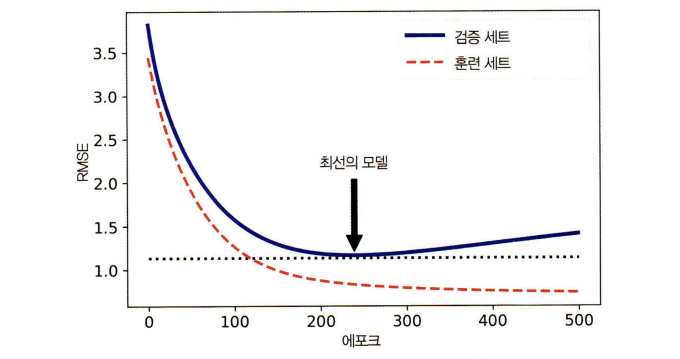

In [ ]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler
X_train, X_val, y_train, y_val=train_test_split(X, y, test_size=0.2)

# 데이터 준비
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias = False)),
    ("std_scaler", StandardScaler())
])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=None, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
  sgd_reg.fit(X_train_poly_scaled, y_train.ravel())   # 훈련을 이어서 진행합니다.
  y_val_predict = sgd_reg.predict(X_val_poly_scaled)
  val_error = mean_squared_error(y_val, y_val_predict)
  if val_error < minimum_val_error:
    minimum_val_error = val_error
    best_epoch = epoch
    best_model = clone(sgd_reg)

- warm_start = True로 지정하면 fit() 메서드가 호출될 때 처음부터 다시 시작하지 않고 이전 모델 파라미터에서 훈련을 이어간다.

## 4.6 로지스틱 회귀

- 샘플이 특정 클래스에 속할 확률을 추정하는 데 널리 사용
- 이진 분류기

### 4.6.1 확률 추정

- 로지스틱 회귀 모델은 선형 회귀 모델과 같이 입력 특서의 가중치 합을 구하고 편향을 더한다.
- 대신 선형 회귀처럼 바로 결과를 출력하지 않고 결괏값의 로지스틱을 출력한다.


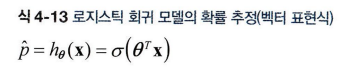

로지스틱은 0과 1 사이의 값을 출력하는 시그모이드 함수이다.

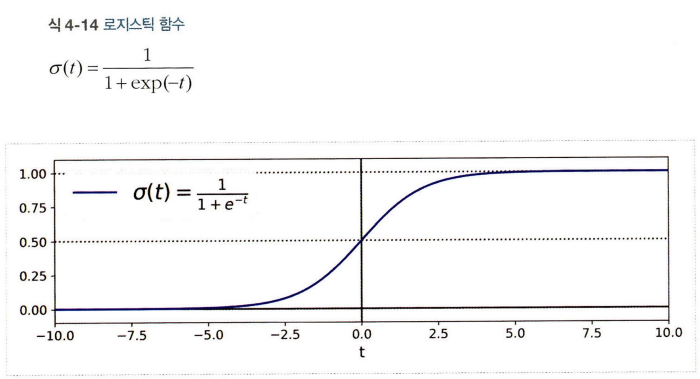

로지스틱 회귀 모델이 샘플 x가 양성 클래스에 속할 확률 phat = h(x)를 추정하면 이에 대한 예측 yhat을 쉽게 구할 수 있다.

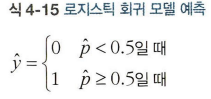

### 4.6.2 훈련과 비용 함수

훈련의 목적 : 양성 샘플(y=1)에 대해서는 옾은 확률을 추정하고 음성 샘플(y=0)에 대해서는 낮은 확률을 추정하는 모델의 파라미터 벡터 theta를 찾는 것

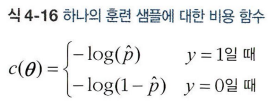

- 이 비용 함수는 t가 0과 1에 가까워지면 -log(t)와 -log(1-t)가 매우 커지므로 타당하다 할 수 있다.
- 따라서 음성 샘플의 확률을 0에 가깝게 추정하거나 양성 샘플의 확률을 1에 가깝게 추정하면 비용은 0에 가까워진다.

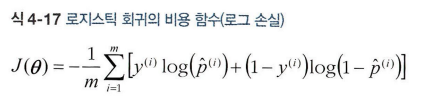

- 로그 손실 : 전체 훈련 세트에 대한 비용 함수는 모든 훈련 샘플의 비용을 평균한 것

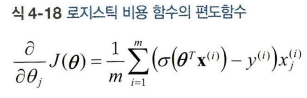

### 4.6.3 결정 경계

In [31]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [32]:
X = iris['data'][:, 3:] # 꽃잎의 너비
y = (iris['target']==2).astype(int) # 1 Iris-Virginica면 1, 아니면 0

In [33]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

- 로지스틱 모델 훈련

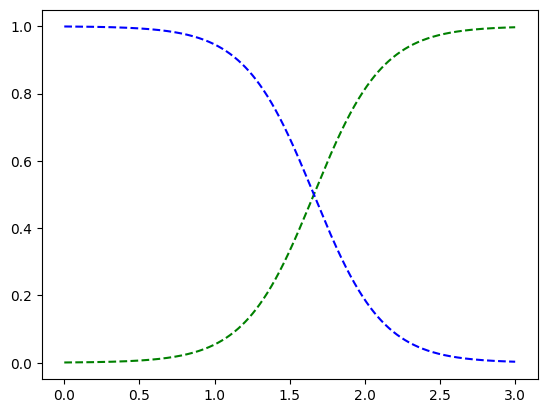

In [34]:
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:,1], "g--", label="Iris virginica")
plt.plot(X_new, y_proba[:,0], "b--", label="Not virginica")

- 꽃잎의 너비가 0~3cm인 꽃에 대해 모델의 추정 확률 계산
- 두 극단 사이에서 분류 확실하지 않지만 가장 가능성 높은 클래스 반환할 것. 1.6cm 근방에서 결정 경계
- 결정 경계 : 양쪽의 확률이 똑같이 50%가 되는 지점

In [35]:
log_reg.predict([[1.7],[1.5]])

array([1, 0])

다른 선형 모델처럼 로지스틱 회귀 모델도 l1,l2 페널티를 사용하여 규제할 수 있다. 사이ㅣㅋㅅ런은 l2 페널티를 기본으로 한다.

### 4.6.4 소프트맥스 회귀

소프트맥스 회귀, 다항 로지스틱 회귀
- 로지스틱 회귀 모델은 여러 개의 이진 분류기를 훈련시켜 연결하지 않고 직접 다중 클래스를 지원하도록 일반화될 수 있다.
- 소프트맥스 회귀 모델이 각 클래스 k에 대한 점수 계산 -> 소프트맥스 함수 적용 -> 각 클래스의 확률 추정

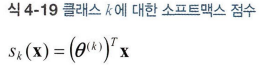

각 클래스는 자신만의 파라미터 벡터(theta(k))가 있다.

-> 파라미터 행렬에 행으로 저장

샘플에 대해 각 클래스의 점수가 계산되면 소프트맥스 함수 통과시켜 클래스 k에 속할 확률 추정

-> 이 함수는 각 점수에 지수 함수를 적용한 후 정규화

 -> 이 점수를 로짓 또는 로그-오즈라고 부른다.

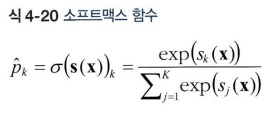

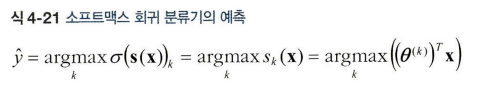

- 소프트맥스 회귀 분류기는 추정 확률이 가장 높은 클래스를 선택한다.

훈련 방법
- 모델이 타깃 클래스에 대해서 높은 확률을 추정하도록 만드는 것이 목적

- 크로스 엔트로피 비용 함수를 최소화 하는 것 : 타깃 클래스에 대해 낮은 확률을 예측하는 모델을 억제하므로 이 목적에 부합하다.

사이킷런의 LogisticRegression은 클래스가 둘 이상일 때 기본적으로 일대다(OvA) 전략 사용


multi_class 매개변수를 "multinomial"로 바꾸면 소프트맥스 회귀 사용 가능
- solver 매개변수에 "lbfgs"와 같이 소프트맥스 회귀 지원하는 알고리즘 지정해야한다.
- 기본적으로 하이퍼파라미터 C 사용하여 조절할 수 있는 l2 규제 적용

In [36]:
X = iris["data"][:, (2,3)] # 꽃잎 길이, 꽃잎 너비
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X,y)

LogisticRegression(C=10, multi_class='multinomial')

In [37]:
softmax_reg.predict([[5,2]])

array([2])

In [38]:
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

- 94.2%의 확률로 클래스 2 라고 출력할 것이다.